In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [62]:
train = pd.read_csv('./train_data.csv')
test = pd.read_csv('./test_data.csv')

In [4]:
train.head()

,id,acousticness,danceability,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,year,duration-min,popularity
0,2015,0.949,0.235,0.0276,No,0.9270,5,0.513,-27.398,Major,01-01-1947,0.0381,110.838,0.0398,1947,3.0,very low
1,15901,0.855,0.456,0.4850,No,0.0884,4,0.151,-10.046,Major,13-11-2020,0.0437,152.066,0.8590,2020,2.4,low
2,9002,0.827,0.495,0.4990,No,0.0000,0,0.401,-8.009,Minor,01-01-1950,0.0474,108.004,0.7090,1950,2.6,very low
3,6734,0.654,0.643,0.4690,No,0.1080,7,0.218,-15.917,Major,30-04-1974,0.0368,83.636,0.9640,1974,2.4,low
4,15563,0.738,0.705,0.3110,No,0.0000,5,0.322,-12.344,Major,01-01-1973,0.0488,117.260,0.7850,1973,3.4,average


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'duration-min'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

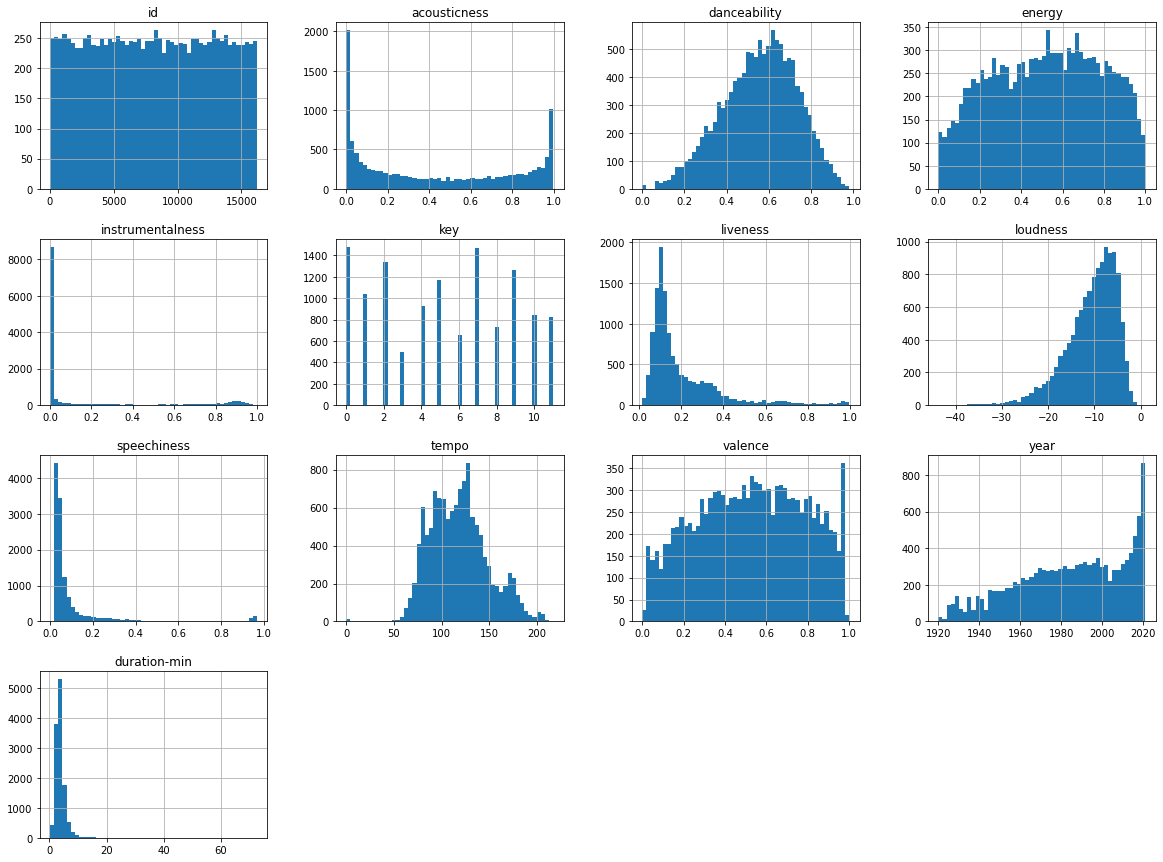

In [5]:
train.hist(bins=50,figsize=(20,15))

In [6]:
train.describe()

,id,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,year,duration-min
count,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000,12227.000000
mean,8094.034350,0.430578,0.556353,0.522129,0.149321,5.205202,0.201365,-10.668687,0.097680,118.167495,0.525300,1984.517298,3.888133
std,4690.929822,0.366893,0.175373,0.262482,0.297954,3.526954,0.173987,5.506888,0.155895,30.200064,0.258205,25.911998,2.383133
min,1.000000,0.000001,0.000000,0.000020,0.000000,0.000000,0.014700,-43.738000,0.000000,0.000000,0.000000,1920.000000,0.200000
25%,4026.000000,0.058950,0.438000,0.303000,0.000000,2.000000,0.096200,-13.656000,0.034700,95.050500,0.321000,1966.000000,2.900000
50%,8093.000000,0.354000,0.569000,0.534000,0.000115,5.000000,0.132000,-9.584000,0.045600,116.915000,0.532000,1987.000000,3.600000
75%,12180.000000,0.805000,0.685000,0.739000,0.055650,8.000000,0.252000,-6.571500,0.078900,136.108500,0.737000,2008.000000,4.400000
max,16227.000000,0.996000,0.980000,1.000000,1.000000,11.000000,0.997000,1.006000,0.968000,216.843000,1.000000,2021.000000,72.800000


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'duration-min'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

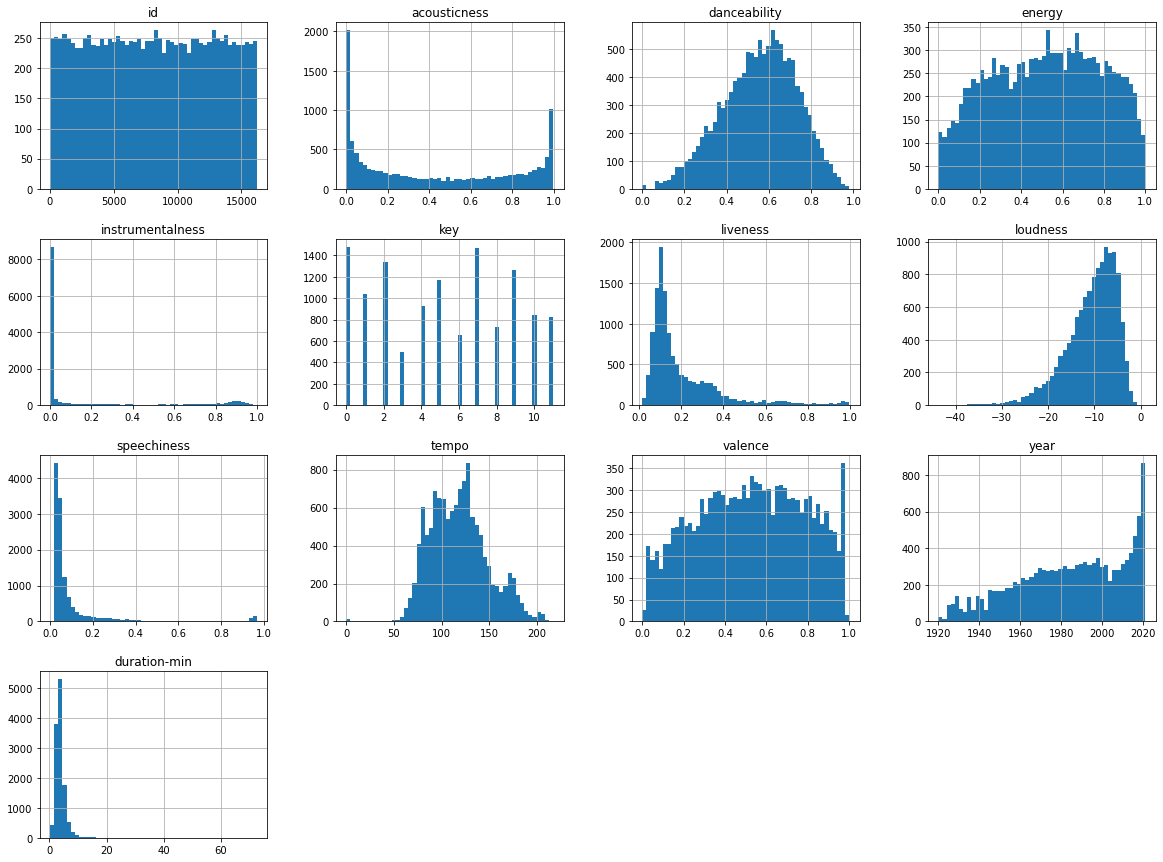

In [12]:
train.hist(figsize=(20,15),bins=50)

In [63]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
target_enc = OrdinalEncoder(categories=[['very low','low','average','high','very high']])
cat_enc = LabelEncoder()
train = train.drop(['id','release_date','energy'],axis=1)
num_cols = train.select_dtypes(include=np.number).columns.tolist()
cat_cols=['mode','explicit']

train.popularity = target_enc.fit_transform(train.loc[:,['popularity']])
for i in cat_cols:
    train[i] = cat_enc.fit_transform(train[i])
    

array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>,
        <AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'explicit'}>],
       [<AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'liveness'}>,
        <AxesSubplot:title={'center':'loudness'}>],
       [<AxesSubplot:title={'center':'mode'}>,
        <AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'tempo'}>,
        <AxesSubplot:title={'center':'valence'}>],
       [<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'duration-min'}>,
        <AxesSubplot:title={'center':'popularity'}>, <AxesSubplot:>]],
      dtype=object)

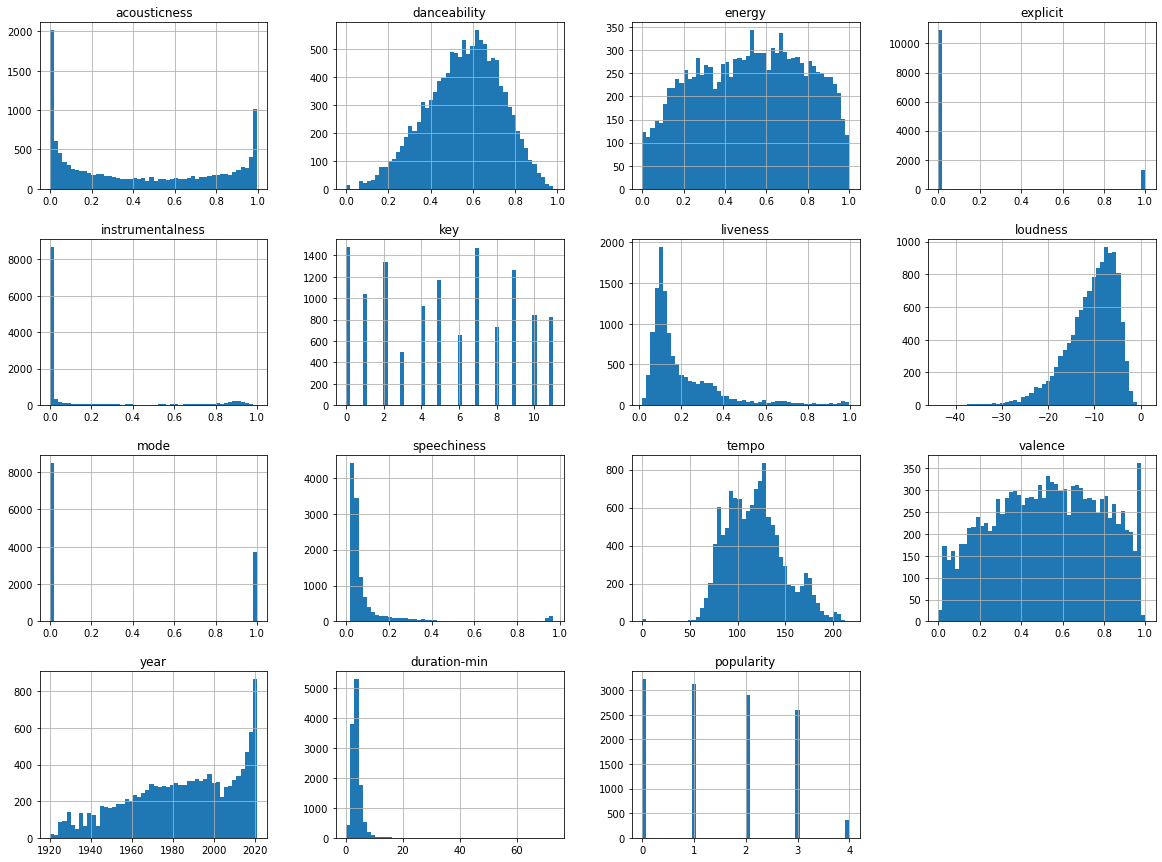

In [54]:
train.hist(figsize=(20,15),bins=50)

In [55]:
train.shape

(12227, 15)

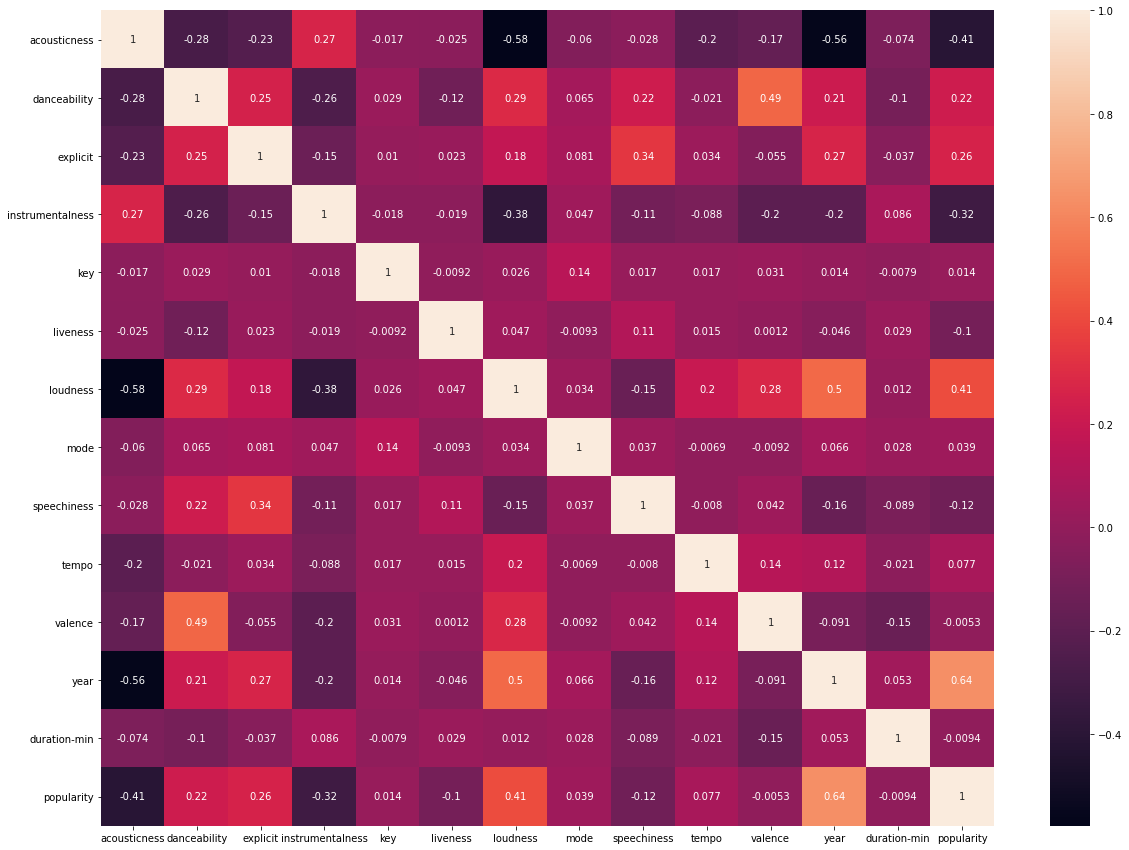

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

f = plt.figure(figsize=(20,15))
sns.heatmap(train.corr(), annot = True)
plt.show()

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = train.drop(['popularity'],axis=1)
y = train.popularity

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=7)
y_train = np.reshape(y_train,(len(y_train),))
xgb_model=XGBClassifier(random_state=7,verbosity=1)
xgb_model.fit(x_train,y_train)

XGBClassifier(objective='multi:softprob', random_state=7)

In [45]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(xgb_model,x,y,cv=5,scoring='accuracy',verbose=2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   5.4s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.4s remaining:    0.0s


[CV] END .................................................... total time=   5.4s
[CV] END .................................................... total time=   5.4s
[CV] END .................................................... total time=   5.1s
[CV] END .................................................... total time=   5.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   26.6s finished


In [48]:
score.mean()

0.6303273488538526

In [49]:
y_pred_xgb = xgb_model.predict(x_test)
predictions = [round(value) for value in y_pred_xgb]
accuracy_xgb = accuracy_score(y_test,predictions)
print("Accuracy of the XGB model is:",accuracy_xgb*100)

Accuracy of the XGB model is: 63.39602071409103


In [50]:
train_pred_xgb = xgb_model.predict(x_train)
pred = [round(value) for value in train_pred_xgb]
train_acc_xgb = accuracy_score(y_train,pred)
print("Acc for training data is:",train_acc_xgb*100)

Acc for training data is: 66.05515307314793


In [38]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(random_state=7)
ada_model.fit(x_train,y_train)

AdaBoostClassifier(random_state=7)

In [41]:
y_pred_ada = ada_model.predict(x_test)
predictions = [round(value) for value in y_pred_ada]
accuracy_ada = accuracy_score(y_test,predictions)
print("Accuracy of the Ada model is:",accuracy_ada*100)

Accuracy of the Ada model is: 59.79831016625784


In [40]:
train_pred_ada = ada_model.predict(x_train)
pred = [round(value) for value in train_pred_ada]
train_acc_ada = accuracy_score(y_train,pred)
print("Acc for training data is:",train_acc_ada*100)

Acc for training data is: 59.40640336527226


In [82]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=7,boosting_type='dart',reg_lambda=1)
lgbm_model.fit(x_train,y_train)

LGBMClassifier(boosting_type='dart', random_state=7, reg_lambda=1)

In [83]:
y_pred_lgbm = lgbm_model.predict(x_test)
predictions = [round(value) for value in y_pred_lgbm]
accuracy_lgbm = accuracy_score(y_test,predictions)
print("Accuracy of the LGBM model is:",accuracy_lgbm*100)

Accuracy of the LGBM model is: 63.31425456527664


In [84]:
train_pred_lgbm = lgbm_model.predict(x_train)
pred = [round(value) for value in train_pred_lgbm]
train_acc_lgbm = accuracy_score(y_train,pred)
print("Acc for training data is:",train_acc_lgbm*100)

Acc for training data is: 76.8053283477448


In [66]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

params={
     "max_depth" : [3,4,5,6,8,10,12,15,17],
     "num_leaves" : [20,25,30,35,40],
     "min_samples_leaf" : [1,3,5,7],
     "max_features" : [0.25,0.3,0.4,0.5,0.6,0.7],
    "n_estimators" : [100,150,200,250]
 } 

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))        

In [ ]:
from datetime import datetime

start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(x,y)
timer(start_time) # timing ends here for "start_time" variable